In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/next-word-predictor-dataset-nlp-task/Next Word Predictor Dataset.txt


In [22]:
with open("/kaggle/input/next-word-predictor-dataset-nlp-task/Next Word Predictor Dataset.txt", "r") as file:
    data = file.read().splitlines()  # Split by lines


In [23]:
df = pd.DataFrame(data, columns=['Text'])
df.head()

,Text
0,I hope this email finds you well
1,Thank you for your prompt response
2,I appreciate your valuable input on this matter
3,Please find attached the document you requested
4,I am writing to inform you about the upcoming ...


In [24]:
df['Text'] = df['Text'].str.lower()
df.head()

,Text
0,i hope this email finds you well
1,thank you for your prompt response
2,i appreciate your valuable input on this matter
3,please find attached the document you requested
4,i am writing to inform you about the upcoming ...


In [25]:
#removing punctuations
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['Text'] = df['Text'].apply(remove_punctuation)
df.head()

,Text
0,i hope this email finds you well
1,thank you for your prompt response
2,i appreciate your valuable input on this matter
3,please find attached the document you requested
4,i am writing to inform you about the upcoming ...


In [27]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.data.path.append('/usr/share/nltk_data')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

In [28]:
import spacy

# Load spaCy's small English model
nlp = spacy.load('en_core_web_sm')

def normalize_text(text):
    doc = nlp(text)
    # Use lemmatization to normalize words
    normalized_words = [token.lemma_ for token in doc]
    return ' '.join(normalized_words)

df['Text'] = df['Text'].apply(normalize_text)
df.head()

,Text
0,I hope this email find you well
1,thank you for your prompt response
2,I appreciate your valuable input on this matter
3,please find attach the document you request
4,I be write to inform you about the upcoming event


In [76]:
import nltk
nltk.download('wordnet', download_dir='/kaggle/working/nltk_data')
nltk.download('averaged_perceptron_tagger', download_dir='/kaggle/working/nltk_data')
nltk.download('omw-1.4', download_dir='/kaggle/working/nltk_data')
nltk.data.path.append('/kaggle/working/nltk_data')
nltk.data.path.append('/kaggle/working/nltk_data')
nltk.download('wordnet', download_dir='/kaggle/working/nltk_data')
nltk.download('averaged_perceptron_tagger', download_dir='/kaggle/working/nltk_data')
nltk.download('omw-1.4', download_dir='/kaggle/working/nltk_data')
nltk.download('averaged_perceptron_tagger')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
max_classes = len(tokenizer.index_word)+1

input_sequences = []
for sentence in data:
  tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]
  
  for i in range(1,len(tokenized_sentence)):
    input_sequences.append(tokenized_sentence[:i+1])
max_len=  max([len(x) for x in input_sequences])
min_len=  min([len(x) for x in input_sequences])
print("max_len : ", max_len)
print("min_len : ",min_len)

from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequence = pad_sequences(input_sequences, maxlen=max_len, padding='pre')
print("input_sequences[:3] : ", input_sequences[:3])
print("padded_input_sequence : ",padded_input_sequence)

X = padded_input_sequence[:, :-1]
y = padded_input_sequence[:, -1]
print("X shape : ", X.shape)
print("Y shape : ", y.shape)
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes=max_classes)
print("Y shape : ", y.shape)

In [33]:
import nltk
from nltk.tokenize import word_tokenize
def pos_tag_text(text):
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    return pos_tags

df['POS_Tags'] = df['Text'].apply(pos_tag_text)
df.head()

,Text,POS_Tags
0,I hope this email find you well,"[(I, PRP), (hope, VBP), (this, DT), (email, NN..."
1,thank you for your prompt response,"[(thank, NN), (you, PRP), (for, IN), (your, PR..."
2,I appreciate your valuable input on this matter,"[(I, PRP), (appreciate, VBP), (your, PRP$), (v..."
3,please find attach the document you request,"[(please, VB), (find, VB), (attach, IN), (the,..."
4,I be write to inform you about the upcoming event,"[(I, PRP), (be, VB), (write, VBN), (to, TO), (..."


In [35]:
# Flatten the POS Tags and create unique lists for words and POS tags
words = [word for tags in df['POS_Tags'] for word, _ in tags]
pos_tags = [tag for tags in df['POS_Tags'] for _, tag in tags]

# Create mappings
word_encoder = LabelEncoder()
pos_encoder = LabelEncoder()

word_encoder.fit(words)
pos_encoder.fit(pos_tags)

LabelEncoder()

In [36]:

# Convert POS tags to numeric values
def encode_pos_tags(pos_tags):
    words_encoded = [word_encoder.transform([word])[0] for word, _ in pos_tags]
    pos_tags_encoded = [pos_encoder.transform([tag])[0] for _, tag in pos_tags]
    return words_encoded, pos_tags_encoded

In [37]:
# Prepare data
X = []
y = []

for pos_tags in df['POS_Tags']:
    words_encoded, pos_tags_encoded = encode_pos_tags(pos_tags)
    X.append(words_encoded)
    y.append(pos_tags_encoded)

# Pad sequences
max_len = max(len(seq) for seq in X)  # Find the maximum length
max_len

21

In [75]:
test_input_sequences = []
for sentence in data:
  test_tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]

  for i in range(1,len(test_tokenized_sentence)):
    test_input_sequences.append(test_tokenized_sentence[:i+1])
    
test_padded_input_sequence = pad_sequences(test_input_sequences, maxlen=max_len, padding='pre')

X_test = test_padded_input_sequence[:,: -1]
y_test = test_padded_input_sequence[:, -1]
y_test = to_categorical(y_test,num_classes=max_classes)
X_test.shape, y_test.shape

((45447, 8), (45447, 2964))

In [76]:
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)
X_test.shape, y_test.shape

((45447, 8), (45447, 2964))

In [77]:
# Replace NaN values with 0
X_cleaned = X_test.fillna(0)
y_cleaned = y_test.fillna(0)
# Convert DataFrame back to a NumPy array
X_cleaned = dftest_filled.to_numpy()
y_cleaned = y_cleaned.to_numpy()
# Check the shape
print(X_test_cleaned.shape)

print(y_cleaned.shape)

(696, 21)
(45447, 2964)


In [78]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your data and labels respectively
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.15, random_state=1)

# Check shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(38629, 8) (6818, 8) (38629, 2964) (6818, 2964)


In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, BatchNormalization,Bidirectional, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow import keras
max_classes = y_cleaned.shape[1]

model = Sequential()
model.add(Embedding(input_dim=max_classes+1, output_dim=200, input_length=20))

model.add(Bidirectional(LSTM(256, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001))))
model.add(BatchNormalization())

model.add(Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001))))
model.add(BatchNormalization())

model.add(Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001))))
model.add(BatchNormalization())

model.add(Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001))))
model.add(BatchNormalization())

model.add(Bidirectional(LSTM(32, kernel_regularizer=keras.regularizers.l2(0.001))))
model.add(BatchNormalization())

model.add(Dense(max_classes, activation='softmax'))

# Compile the model with a custom learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [97]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [98]:
history = model.fit(X_train, y_train,  epochs=100, callbacks = [reduce_lr, early_stopping], validation_data=( X_test,y_test))

Epoch 1/100
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.0579 - loss: 7.8020 - val_accuracy: 0.1261 - val_loss: 5.5261 - learning_rate: 0.0010
Epoch 2/100
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.1434 - loss: 5.2426 - val_accuracy: 0.1672 - val_loss: 5.1021 - learning_rate: 0.0010
Epoch 3/100
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.2082 - loss: 4.5864 - val_accuracy: 0.2382 - val_loss: 4.5897 - learning_rate: 0.0010
Epoch 4/100
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.2657 - loss: 4.1443 - val_accuracy: 0.2807 - val_loss: 4.2996 - learning_rate: 0.0010
Epoch 5/100
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.3085 - loss: 3.7391 - val_accuracy: 0.3126 - val_loss: 4.1649 - learning_rate: 0.0010
Epoch 6/100
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.3472 - loss: 3.4484 - val_accuracy: 0.3425 - val_loss: 4.0318 - learning_rate: 0.0010
Epoch 7/100
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step -

In [102]:
model.save("Next_word_predictor.h5")

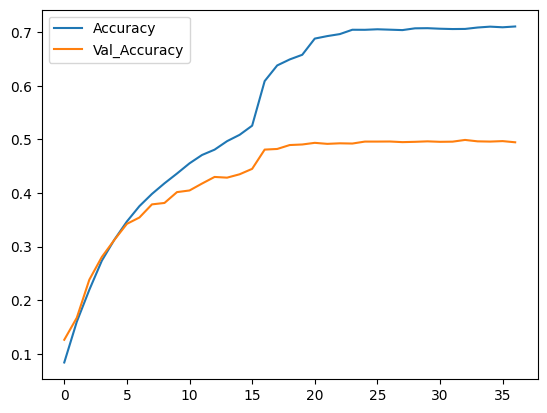

In [103]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['val_accuracy'], label="Val_Accuracy")
plt.legend()
plt.show()

In [104]:
text = "What"
for i in range(15):
    #tokenize
    token_text = tokenizer.texts_to_sequences([text])[0]
    #padding
    padded_token_text = pad_sequences([token_text], maxlen= max_len, padding='pre')
    pos = np.argmax(model.predict(padded_token_text))
    for word, index in tokenizer.word_index.items():
        if index==pos:
            text = text+ " "+word
            print(text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
What do
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
What do you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
What do you have
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
What do you have a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
What do you have a moment
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
What do you have a moment i'd
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
What do you have a moment i'd appreciate
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
What do you have a moment i'd appreciate your
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
What do you have a moment i'd appreciate your help
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
What do you have a moment i'd appreciate your help on
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
What do you have a moment i'd appreciate your help on a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
What do you have a moment i'd appreciate your help on a new
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
What do you have a moment i'd appreciate your help on a new poetry
1/1 ━━━━━━━━━━━━━━━